In [1]:
import graphlab

In [3]:
graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

In [4]:
sales_data = graphlab.SFrame('home_data.gl/')

In [6]:
graphlab.canvas.set_target('ipynb')
sales_data.show(view="Scatter Plot", x="sqft_living", y="price")

In [9]:
train_data, test_data = sales_data.random_split(0.8, seed=2017)

In [10]:
features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [14]:
train_model = graphlab.linear_regression.create(train_data, target='price', 
                                        features=features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17344

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 128

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.058093     | 3550406.220275     | 150321.316579 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [16]:
print train_model.evaluate(test_data)

{'max_error': 5056404.701428561, 'rmse': 180148.05182102855}


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

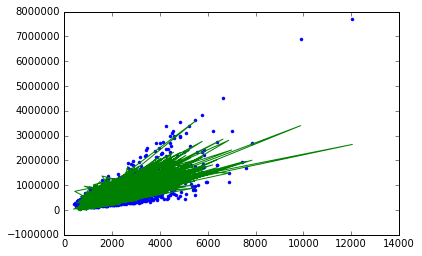

In [19]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
        test_data['sqft_living'], train_model.predict(test_data), '-')

In [20]:
house1 = sales_data[sales_data['id']=='5309101200']

In [23]:
print house1['price']
print train_model.predict(house1)

[620000L, ... ]
[632853.1033241707]


In [24]:
house2 = sales_data[sales_data['id']=='1925069082']

In [25]:
print house2['price']
print train_model.predict(house2)

[2200000L, ... ]
[2016733.836426869]
